In [ ]:
#시각화 한글깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
picher=pd.DataFrame(pd.read_csv('picher_stats_2017.csv',engine='python',encoding='CP949'))
batter=pd.DataFrame(pd.read_csv('batter_stats_2017.csv',engine='python',encoding='CP949'))
#한글포함된 파일 읽기 =>encoding 지정해줘야함
real2018_sal=picher['연봉(2018)']
print(picher.head(5))
print(batter.head(5))

   선수명   팀명   승   패  세  홀드  블론  경기  선발     이닝  ...  홈런/9  BABIP  LOB%   ERA  \
0   켈리   SK  16   7  0   0   0  30  30  190.0  ...  0.76  0.342  73.7  3.60   
1   소사   LG  11  11  1   0   0  30  29  185.1  ...  0.53  0.319  67.1  3.88   
2  양현종  KIA  20   6  0   0   0  31  31  193.1  ...  0.79  0.332  72.1  3.44   
3  차우찬   LG  10   7  0   0   0  28  28  175.2  ...  1.02  0.298  75.0  3.43   
4  레일리   롯데  13   7  0   0   0  30  30  187.1  ...  0.91  0.323  74.1  3.80   

   RA9-WAR   FIP  kFIP   WAR  연봉(2018)  연봉(2017)  
0     6.91  3.69  3.44  6.62    140000     85000  
1     6.80  3.52  3.41  6.08    120000     50000  
2     6.54  3.94  3.82  5.64    230000    150000  
3     6.11  4.20  4.03  4.63    100000    100000  
4     6.13  4.36  4.31  4.38    111000     85000  

[5 rows x 22 columns]
   선수명   팀명   경기   타석   타수   안타  홈런   득점   타점  볼넷  ...  도루  BABIP     타율  \
0   최정   SK  130  527  430  136  46   89  113  70  ...   1  0.316  0.316   
1  최형우  KIA  142  629  514  176  26   98  12

In [ ]:
picher2=picher
batter2=batter

picher2Y=picher2['연봉(2018)']
picher2X=picher2.drop(['연봉(2018)','선수명'],axis=1)

print(picher2X.head())
print(picher2Y.head())

    팀명   승   패  세  홀드  블론  경기  선발     이닝  삼진/9  볼넷/9  홈런/9  BABIP  LOB%   ERA  \
0   SK  16   7  0   0   0  30  30  190.0  8.95  2.13  0.76  0.342  73.7  3.60   
1   LG  11  11  1   0   0  30  29  185.1  7.43  1.85  0.53  0.319  67.1  3.88   
2  KIA  20   6  0   0   0  31  31  193.1  7.36  2.09  0.79  0.332  72.1  3.44   
3   LG  10   7  0   0   0  28  28  175.2  8.04  1.95  1.02  0.298  75.0  3.43   
4   롯데  13   7  0   0   0  30  30  187.1  7.49  2.11  0.91  0.323  74.1  3.80   

   RA9-WAR   FIP  kFIP   WAR  연봉(2017)  
0     6.91  3.69  3.44  6.62     85000  
1     6.80  3.52  3.41  6.08     50000  
2     6.54  3.94  3.82  5.64    150000  
3     6.11  4.20  4.03  4.63    100000  
4     6.13  4.36  4.31  4.38     85000  
0    140000
1    120000
2    230000
3    100000
4    111000
Name: 연봉(2018), dtype: int64


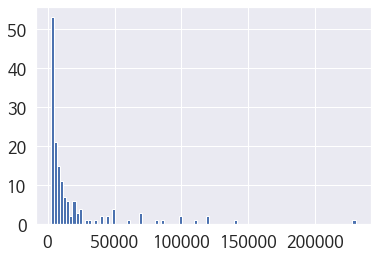

In [ ]:
picher['연봉(2018)'].hist(bins=100) #연봉에 관한 정보 시각화

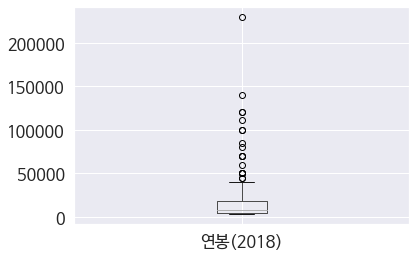

In [ ]:
picher.boxplot(column=['연봉(2018)'])

In [ ]:
#투수 데이터들의 피처항목들을 데이터 프레임으로 추출
picher_features=picher[['승','패', '세' ,'홀드' ,'블론' ,'경기', '선발', '이닝', '홈런/9', 'BABIP', 'LOB%',  'ERA' ,'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2018)' ,'연봉(2017)']]

#데이터의 피처들을 히스토그램으로 표현
def plot_hist_each_column(df):
  #차트의 기본크기 설정
  plt.rcParams['figure.figsize']=[20,16]
  fig=plt.figure()
  #데이터 피처들을 반복문을 통해 subplot 으로 그림
  for i in range(len(df.columns)):
    #5*5 사이즈에서 차례대로 그려나감
    ax= fig.add_subplot(5,5,i+1) 
    plt.hist(df[df.columns[i]],bins=50)
    ax.set_title(df.columns[i])
  plt.show()

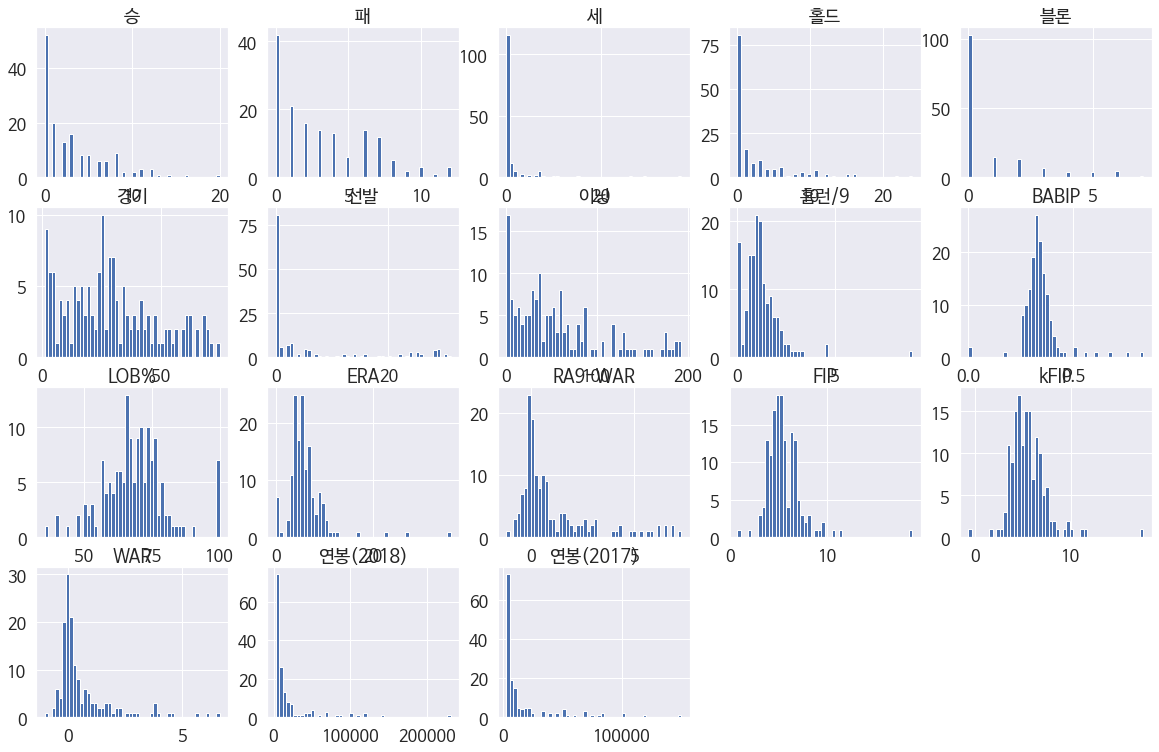

In [ ]:
plot_hist_each_column(picher_features)

히스토그램을 통해 각 피쳐에대한 분포를 알아볼 수 있음
이를 통해 좋은변수를 뽑고,스켕일링을 어떻게 진행해야할지 파악

In [ ]:
pd.options.mode.chained_assignment = None #경고무시

발생오류 

ValueError: Expected 2D array, got 1D array instead:array=[16. 11. 20. 10. 13.  8.  8. 14.  9.  9. 12. 11.  8. 12.  8. 11.  8.  7.  6.  1.  6.  6.  3.  7. 12.  4. 10.  5.  5.  7.  3.  7.  4.  8.  5.  3.  8.  4.  8.  4.  1.  2.  3.  3.  3.  6.  3.  2.  3.  4.  2.  1.  7.  2.  1.  3.  5.  1.  8.  1.  1.  1.  3.  3.  3.  0.  0.  6.  0.  0.  0.  4.  0.  0.  0.  1.  1.  5.  1.  6.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  2.  0.  0.  1.  2.  0.  0.  2.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  3.  2.  3.  0.  0.  7.  1.  5.  0.  3.  1.  2.  0.  0.  4.  5.  0.  2.  5.  2.  3.  0.  0.  4.].Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample. site:stackoverflow.com

In [ ]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
def standard_scaling(df,scale_columns):
  for col in scale_columns:
    df[col]=sc.fit_transform(df[[col]])
    #사이킷런의 standardscler 는 항상 2차원 의 형태로 입력해줘야하기 때문에 
    #차원 데이터이지만 [[]] 이용해 2차원형태로 넣어줘야함 
  return df


scale_columns=['승','패', '세' ,'홀드' ,'블론' ,'경기', '선발', '이닝', '홈런/9', 'BABIP', 'LOB%',  'ERA' ,'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2018)' ,'연봉(2017)']

scale_picher=standard_scaling(picher,scale_columns)


picher_df=scale_picher

#2017성적으로 2018연봉을 예측하는 문제이므로 2018연봉 컬럼을 구하는 값 y로 이름 바꾸기
picher_df=picher_df.rename(columns={'연봉(2018)':'y'})

print(scale_picher.head())
print(picher_df.head())



   선수명   팀명         승         패         세        홀드        블론        경기  \
0   켈리   SK  3.324578  1.231202 -0.307465 -0.587641 -0.545389  0.059630   
1   소사   LG  2.026181  2.513001 -0.098828 -0.587641 -0.545389  0.059630   
2  양현종  KIA  4.363295  0.910752 -0.307465 -0.587641 -0.545389  0.111423   
3  차우찬   LG  1.766502  1.231202 -0.307465 -0.587641 -0.545389 -0.043956   
4  레일리   롯데  2.545540  1.231202 -0.307465 -0.587641 -0.545389  0.059630   

         선발        이닝  ...      홈런/9     BABIP      LOB%       ERA   RA9-WAR  \
0  2.460174  2.653920  ... -0.443844  0.016838  0.448091 -0.588996  3.185125   
1  2.357272  2.556178  ... -0.670731 -0.242485 -0.123170 -0.521574  3.125265   
2  2.563077  2.715757  ... -0.414250 -0.095911  0.309604 -0.627523  2.983779   
3  2.254370  2.358699  ... -0.187363 -0.479259  0.560612 -0.629931  2.749783   
4  2.460174  2.596072  ... -0.295875 -0.197386  0.482713 -0.540837  2.760666   

        FIP      kFIP       WAR  연봉(2018)  연봉(2017)  
0 -0.974240 -1

연속형이 아닌 범주형 피쳐들 one-hot encoding 적용

In [ ]:
team_encoding=pd.get_dummies(picher_df['팀명'])

#팀명을 0,1 로 구분하는 onehot encoding 적용
print(team_encoding)

#기존의 팀명 컬럼 없애고 onehot encoding 적용된 컬럼 추가
picher_df=picher_df.drop(['팀명'],axis=1)
picher_df=picher_df.join(team_encoding)
picher_df

picher2X=picher2X.drop(['팀명'],axis=1)
picher2X=picher2X.join(team_encoding)


     KIA  KT  LG  NC  SK  두산  롯데  삼성  한화
0      0   0   0   0   1   0   0   0   0
1      0   0   1   0   0   0   0   0   0
2      1   0   0   0   0   0   0   0   0
3      0   0   1   0   0   0   0   0   0
4      0   0   0   0   0   0   1   0   0
..   ...  ..  ..  ..  ..  ..  ..  ..  ..
147    0   0   0   0   0   0   0   0   1
148    1   0   0   0   0   0   0   0   0
149    0   0   0   0   0   0   1   0   0
150    0   0   0   0   0   0   0   1   0
151    0   1   0   0   0   0   0   0   0

[152 rows x 9 columns]


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

#학습시 필요없는 컬럼인 선수이름과 결과값 y제거
#columns.difference([])를 이용하여 제외할 컬럼 나열
X=picher_df[picher_df.columns.difference(['선수명','y'])] 
Y=picher_df['y']

#학습데이터,평가데이터 분리
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.3,random_state=42)

print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

dtX_train,dtX_val,dtY_train,dtY_val=train_test_split(picher2X,picher2Y,test_size=0.3,random_state=42)



(106, 28)
(46, 28)
(106,)
(46,)


In [ ]:
from sklearn.metrics import r2_score

#모델 1 KNN regression

r2trainscore=[]
r2valscore=[]
rmse_train_score=[]
rmse_val_score=[]

for i in range(1,20):
  knn=KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train,Y_train)
  knn_Y_train_pred=knn.predict(X_train)
  knn_Y_val_pred=knn.predict(X_val)
  #print(sqrt(mean_squared_error(Y_train,knn_Y_train_pred)))
  #print(sqrt(mean_squared_error(Y_val,knn_Y_val_pred)))
  
  #print(r2_score(Y_train,knn_Y_train_pred))
  #print(r2_score(Y_val,knn_Y_val_pred))
 # print('\n')
  r2trainscore.append(r2_score(Y_train,knn_Y_train_pred))
  r2valscore.append(r2_score(Y_val,knn_Y_val_pred))


print(r2valscore.index(max(r2valscore)))
print(r2valscore[7])
#KNN 가장 좋은 r2 score 모델 n_neighbor = 8 일때 0.6801811753122703
#rmse=0.4099473551053028

7
0.6801811753122702


In [ ]:
#모델 2 Linear regression (SGD)
from sklearn.linear_model import SGDRegressor

r2trainscore=[]
r2valscore=[]
rmse_train_score=[]
rmse_val_score=[]


sgd=SGDRegressor()
sgd.fit(X_train,Y_train)
sgd_Y_train_pred=sgd.predict(X_train)
sgd_Y_val_pred=sgd.predict(X_val)

print(sqrt(mean_squared_error(Y_train,sgd_Y_train_pred)))
print(sqrt(mean_squared_error(Y_val,sgd_Y_val_pred)))
print('\n') 
print(r2_score(Y_train,sgd_Y_train_pred))
print(r2_score(Y_val,sgd_Y_val_pred))

#r2score=0.8565330177474497 / rmse=0.2745693521164005

0.315503920560718
0.28084995746497277


0.9174440762659841
0.8498945121719184


In [ ]:
#모델 3 Linear regression
lr=linear_model.LinearRegression()
lr.fit(X_train,Y_train)

lr_Y_train_pred=lr.predict(X_train)
lr_Y_val_pred=lr.predict(X_val)

print(sqrt(mean_squared_error(Y_train,lr_Y_train_pred)))
print(sqrt(mean_squared_error(Y_val,lr_Y_val_pred)))
print('\n') 
print(r2_score(Y_train,lr_Y_train_pred))
print(r2_score(Y_val,lr_Y_val_pred))

#r2score=0.828067066110366 / rmse=0.30057690922001384

0.2866929089178227
0.30057690922001323


0.931833244596128
0.8280670661103666


성능이 가장 좋았던 SGD 모델 사용

In [ ]:
print(sgd.coef_) #회귀 계수 확인

[-2.45107918e-02 -1.70368979e-03  2.15690452e-03  9.73437135e-02
  2.00646017e-02  3.74212005e-03 -2.29164488e-02 -3.29121122e-02
  1.14095485e-01 -5.62221461e-03  2.92367939e-01 -2.16177279e-03
 -4.53100322e-02 -6.59750696e-02 -1.10629876e-02  2.06162193e-02
  3.23547478e-02 -3.96263007e-02 -5.69430806e-04 -5.73552372e-02
  1.72140290e-02  1.27110771e-01  6.69451219e-01  1.18957221e-02
 -7.01904107e-02  3.98169787e-02 -3.00945168e-02  3.55286962e-02]


In [ ]:
import statsmodels.api as sm

X_train=sm.add_constant(X_train)
model=sm.OLS(Y_train,X_train).fit()
model.summary()

#R-squared 회귀모형의 설명력을 나타내는 지표 0~1 중 1에 가까울수록 설명력이 높다
#t-test 각 독립변수가 개별적으로 유의한지 점검하는 지표
#F-test 회귀식전체에 대한 유의성 검정
#coef 독립변수가 종속변수를 설명해주는 크기

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     39.49
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           4.37e-35
Time:                        08:54:56   Log-Likelihood:                -17.977
No. Observations:                 106   AIC:                             91.95
Df Residuals:                      78   BIC:                             166.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6976      0.966     -0.722      0.473      -2.621       1.226
BABIP         -0.0638      0.056     -1.133      0.261      -0.176       0.048
ERA            0.0475      0.101      0.471      0.639      -0.153       0.248
FIP           -2.9177      3.702     -0.788      0.433     -10.288       4.453
KIA            0.1337      0.151      0.887      0.378      -0.166       0.434
KT             0.0093      0.129      0.072      0.943      -0.248       0.267
LG            -0.1417      0.163     -0.868      0.388      -0.467       0.183
LOB%           0.0069      0.069      0.099      0.921      -0.131       0.145
NC            -0.0863      0.164     -0.528      0.599      -0.412       0.239
RA9-WAR       -0.0786      0.118     -0.665      0.508      -0.314       0.157
SK            -0.1160      0.165     -0.702      0.485      -0.445       0.213
WAR            0.4332      0.103      4.213      0.000       0.228       0.638
kFIP           2.4295      3.158      0.769      0.444      -3.857       8.716
경기            -0.1751      0.142     -1.231      0.222      -0.458       0.108
두산            -0.2060      0.132     -1.564      0.122      -0.468       0.056
롯데            -0.0958      0.161     -0.595      0.554      -0.416       0.225
볼넷/9           0.1059      0.100      1.056      0.294      -0.094       0.306
블론             0.0343      0.055      0.621      0.536      -0.076       0.144
삼성            -0.2030      0.145     -1.401      0.165      -0.491       0.085
삼진/9           0.0475      0.107      0.444      0.659      -0.166       0.261
선발            -0.4582      0.235     -1.946      0.055      -0.927       0.011
세             -0.0108      0.064     -0.169      0.866      -0.138       0.117
승              0.1645      0.101      1.626      0.108      -0.037       0.366
연봉(2017)       0.6834      0.050     13.802      0.000       0.585       0.782
이닝             0.4017      0.311      1.294      0.200      -0.216       1.020
패             -0.0513      0.082     -0.622      0.536      -0.215       0.113
한화             0.0083      0.144      0.058      0.954      -0.278       0.294
홀드            -0.0373      0.079     -0.473      0.638      -0.194       0.120
홈런/9           0.5542      0.636      0.871      0.387      -0.713       1.821
==============================================================================
Omnibus:                       20.732   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.854
Skew:                          -0.150   Prob(JB):                     1.27e-27
Kurtosis:                       8.287   Cond. No.                     4.20e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

[Text(0, 0, 'BABIP'),
 Text(0, 0, 'ERA'),
 Text(0, 0, 'FIP'),
 Text(0, 0, 'KIA'),
 Text(0, 0, 'KT'),
 Text(0, 0, 'LG'),
 Text(0, 0, 'LOB%'),
 Text(0, 0, 'NC'),
 Text(0, 0, 'RA9-WAR'),
 Text(0, 0, 'SK'),
 Text(0, 0, 'WAR'),
 Text(0, 0, 'kFIP'),
 Text(0, 0, '경기'),
 Text(0, 0, '두산'),
 Text(0, 0, '롯데'),
 Text(0, 0, '볼넷/9'),
 Text(0, 0, '블론'),
 Text(0, 0, '삼성'),
 Text(0, 0, '삼진/9'),
 Text(0, 0, '선발'),
 Text(0, 0, '세'),
 Text(0, 0, '승'),
 Text(0, 0, '연봉(2017)'),
 Text(0, 0, '이닝'),
 Text(0, 0, '패'),
 Text(0, 0, '한화'),
 Text(0, 0, '홀드'),
 Text(0, 0, '홈런/9')]

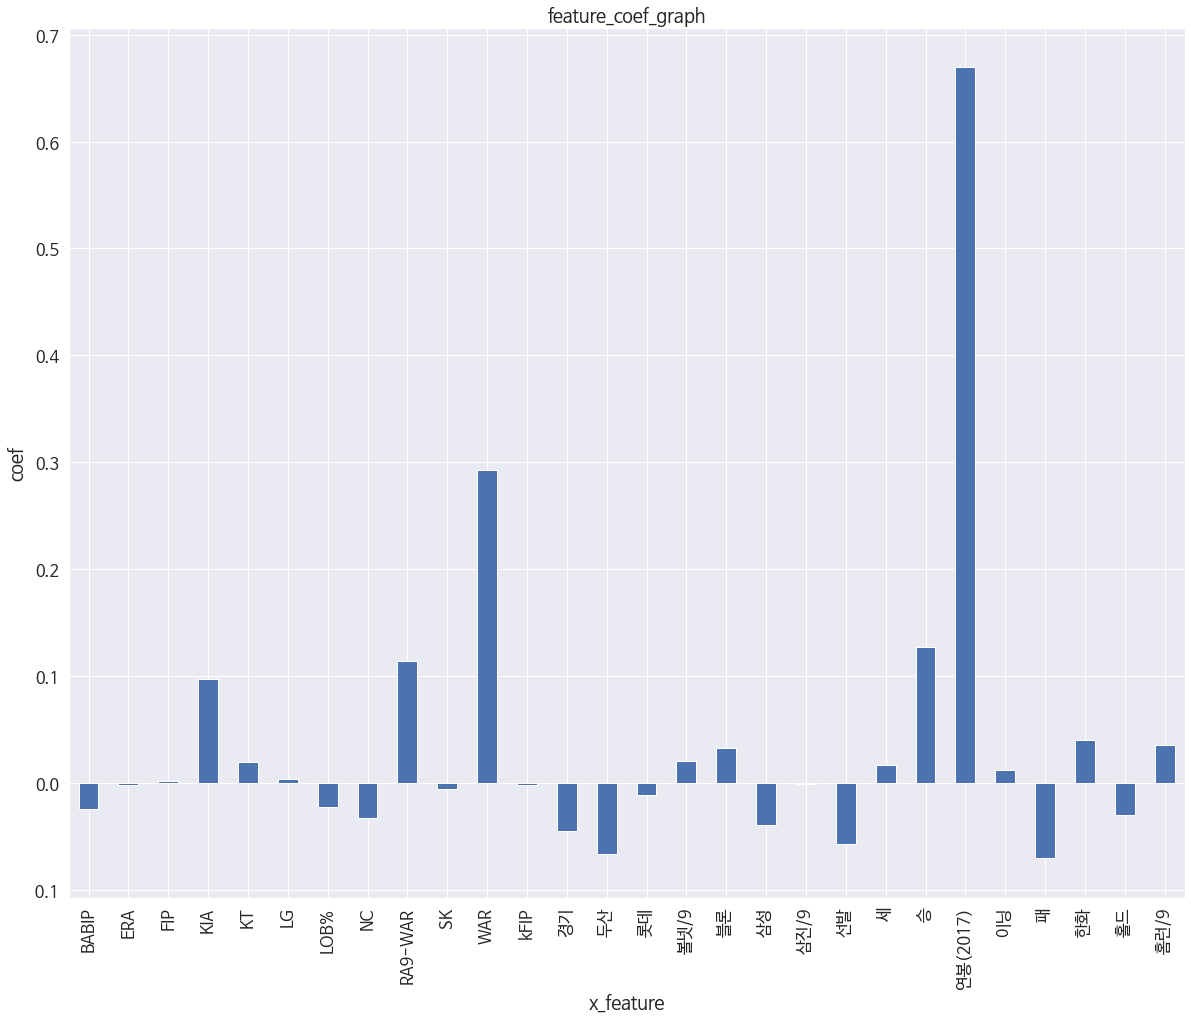

In [ ]:
#학습모델의 회귀계수를 리스트로 
#coefs=sgd.params.tolist()
coefs_series=pd.Series(sgd.coef_)

#학습노델의 설명변수 리스트로 
X_label=sgd.feature_names_in_

#회귀계수 출력
ax=coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_feature')
ax.set_ylabel('coef')
ax.set_xticklabels(X_label)

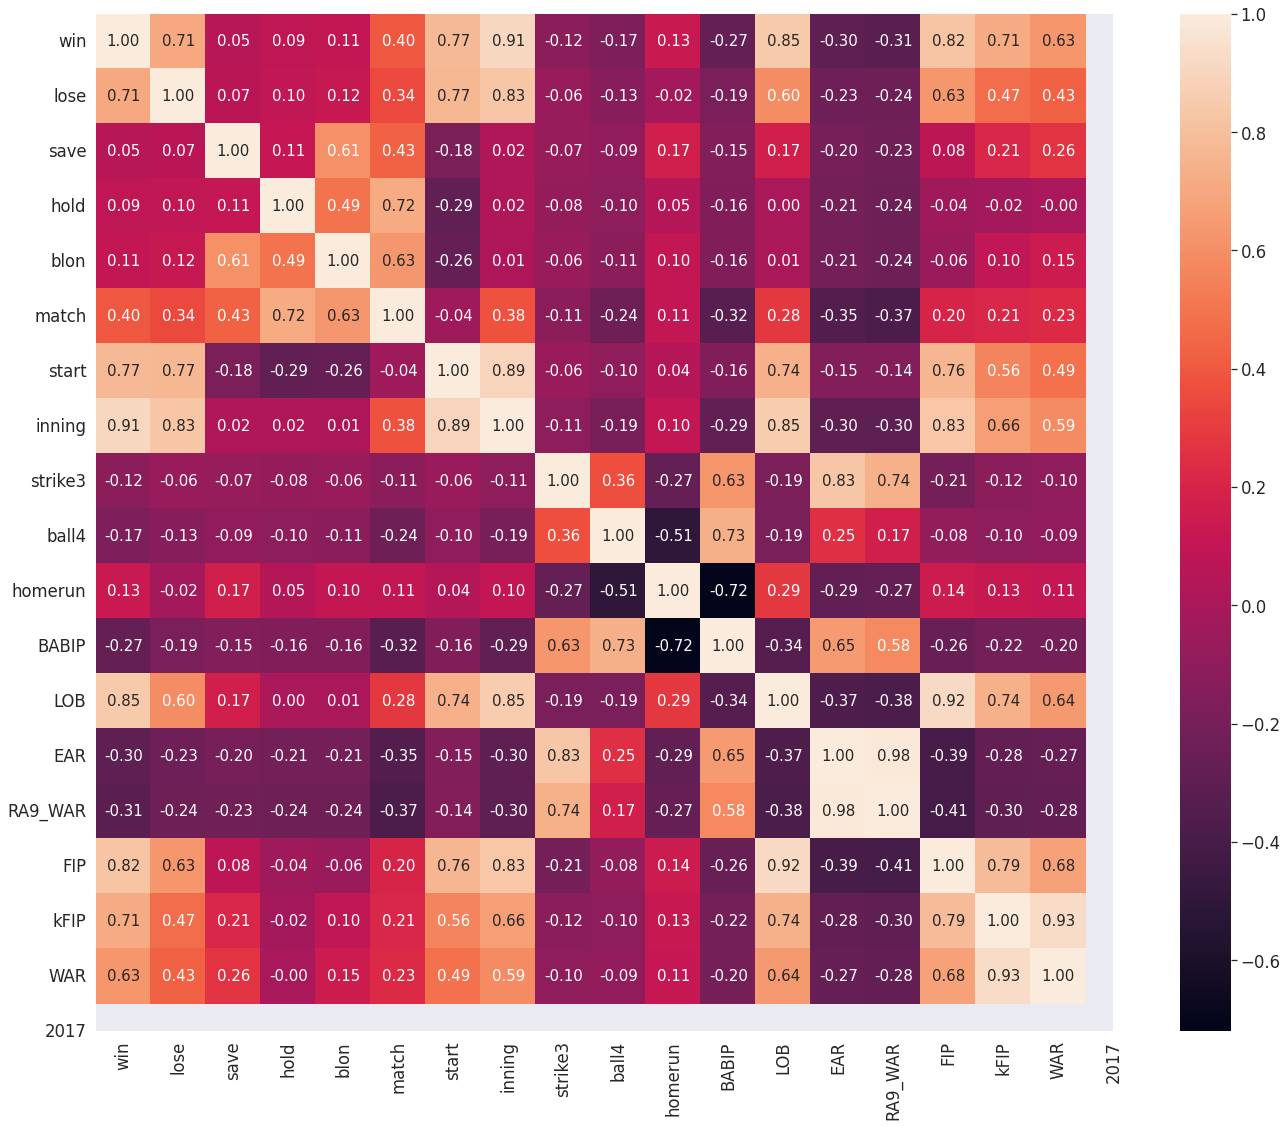

In [ ]:
#feature들 상관관계 분석

import seaborn as sns
corr=scale_picher[scale_columns].corr(method='pearson')
show_cols=['win','lose','save','hold','blon','match','start',
           'inning','strike3','ball4','homerun','BABIP','LOB',
           'EAR','RA9_WAR','FIP','kFIP','WAR','2017']
sns.set(font_scale=1.5)
heatmap=sns.heatmap(corr.values,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=show_cols,xticklabels=show_cols) 
plt.tight_layout()
plt.show()       

회귀분석은 피쳐들간의 독립성을 전제로 하는 분석방법

좋은 회귀분석을 위해서는 상관관계가 높은 피쳐 쌍들을 제거 해줘야함(다중공선성-변수간 상관관계가 높아 분석에 부정적인 영향을 미치는것- 방지)

다중공선성 VIF 계수로 평가 10~15 넘으면 문제있는것으로 판단

In [ ]:
#다중공선성 확인 코드

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['features']=X.columns
vif.round(1)

,VIF Factor,features
0,3.2,BABIP
1,10.6,ERA
2,14238.3,FIP
3,116.3,KIA
4,146.8,KT
5,146.2,LG
6,4.3,LOB%
7,102.5,NC
8,13.6,RA9-WAR
9,146.8,SK


In [ ]:
#사용해야할 피쳐선정
#(VIF 15이하) => BABIP,ERA,RA9-WAR,LOB%,WAR,경기,블론,세,승,연봉(2017),패,홀드
#영향 높은 피쳐 => RA9-WAR,WAR,세,승,연봉,이닝,홈런/9

#둘다 긍정지표 => RA9-WAR,WAR,세,승,연봉

In [ ]:
#새로운 학습데이터 설정
newX=X[['RA9-WAR','WAR','세','승','연봉(2017)']]
print(newX.head()) 


    RA9-WAR       WAR         세         승  연봉(2017)
0  3.185125  4.518029 -0.307465  3.324578  2.743746
1  3.125265  4.108270 -0.098828  2.026181  1.341724
2  2.983779  3.774393 -0.307465  4.363295  5.347500
3  2.749783  3.007992 -0.307465  1.766502  3.344612
4  2.760666  2.818289 -0.307465  2.545540  2.743746


In [ ]:
newX_train,newX_val,newY_train,newY_val=train_test_split(newX,Y,test_size=0.3,random_state=42)

print(newX_train.shape)
print(newX_val.shape)
print(newY_train.shape)
print(newY_val.shape)


(106, 5)
(46, 5)
(106,)
(46,)


In [ ]:
#직접 선정해본 결과

sgd=SGDRegressor()
sgd.fit(newX_train,newY_train)
sgd_Y_train_pred=sgd.predict(newX_train)
sgd_Y_val_pred=sgd.predict(newX_val)

print(sqrt(mean_squared_error(newY_train,sgd_Y_train_pred)))
print(sqrt(mean_squared_error(newY_val,sgd_Y_val_pred)))
print('\n') 
print(r2_score(Y_train,sgd_Y_train_pred))
print(r2_score(Y_val,sgd_Y_val_pred))

#피쳐선정 전:#r2score=0.8565330177474497 / rmse=0.2745693521164005
#피쳐선정 후:r2score=0.8888762162065472 / rmse=0.24164598727054795

#약 0.3 정도 성능향상

0.33753772087075035
0.24784367505085353


0.9055105441894324
0.8831029569081025


In [ ]:
#교재에 나온 선정과정
'''
VIF 계수가 높은 피처들을 우선적으로 제거합니다. 단, (FIP, kFIP)와 같이 유사한 두가지 피처중에는 하나만을 제거합니다.
다시 공선성을 검증합니다. 이전 단계에서는 VIF 계수가 높았던 볼넷, 삼진 등의 피처의 VIF 계수가 낮아진 것을 확인할 수 있습니다. VIF 계수가 비정상적으로 높은 피처를 제거해주면, 다른 피처들의 공선성도 자연스레 감소하기 때문입니다.
여전히 VIF 계수가 높은 피처들을 제거합니다.
남은 피처를 토대로 다시한번 회귀분석을 실시합니다. 분석 결과에서 p-value가 유의하면서도 영향력이 큰 피처들을 선정합니다.
'''

In [ ]:
#교재에 나온 과정대로 해본것
# 피처를 재선정합니다.
newX=X[['FIP','WAR','볼넷/9','삼진/9','연봉(2017)']]
newX_train,newX_val,newY_train,newY_val=train_test_split(newX,Y,test_size=0.3,random_state=42)

sgd=SGDRegressor()
sgd.fit(newX_train,newY_train)
sgd_Y_train_pred=sgd.predict(newX_train)
sgd_Y_val_pred=sgd.predict(newX_val)

print(sqrt(mean_squared_error(newY_train,sgd_Y_train_pred)))
print(sqrt(mean_squared_error(newY_val,sgd_Y_val_pred)))
print('\n') 
print(r2_score(Y_train,sgd_Y_train_pred))
print(r2_score(Y_val,sgd_Y_val_pred))

#피쳐선정 전:#r2score=0.8565330177474497 / rmse=0.2745693521164005
#피쳐선정 후:0.9014357622172986 / rmse=0.22758087412780606

0.3350652636493594
0.23950622675384414


0.9068897411670417
0.8908354916869929


In [ ]:
#선정한 피쳐들의 vif 확인
vifX = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
newvif=pd.DataFrame()
newvif['VIF Factor']=[variance_inflation_factor(vifX.values,i)for i in range(vifX.shape[1])]
newvif['features']=X.columns
newvif.round(1)

,VIF Factor,features
0,1.7,FIP
1,2.1,WAR
2,5.8,볼넷/9
3,5.3,삼진/9
4,1.9,연봉(2017)


분석결과 비교및 시각화

In [ ]:
X = picher_df[['FIP','WAR','볼넷/9','삼진/9','연봉(2017)']]

sgd=SGDRegressor()
sgd.fit(X,Y)
pred_2018_sal=sgd.predict(X)


#스케일링돼있던 값 원래수치로 변경
sal_2018=sc.inverse_transform(pred_2018_sal.reshape(-1,1))

print(r2_score(real2018_sal,sal_2018))


picher_df['예측연봉(2018)']=(sal_2018)
picher_df['y']=real2018_sal

picher=pd.read_csv('picher_stats_2017.csv',engine='python',encoding='CP949')
picher=picher[['선수명','연봉(2017)']]

result_df=picher_df.sort_values(by=['y'],ascending=False)
result_df.drop(['연봉(2017)'],axis=1,inplace=True,errors='ignore')
result_df = result_df.merge(picher, on=['선수명'], how='left')
result_df = result_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]
result_df.columns = ['선수명', '(2018)realsalary', '(2018)predictsalary', '(2017)salary']

# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰
result_df = result_df[result_df['(2017)salary'] != result_df['(2018)realsalary']]
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df.head(10)

0.879322275873216


,index,선수명,(2018)realsalary,(2018)predictsalary,(2017)salary
0,0,양현종,230000,146222.685691,150000
1,1,켈리,140000,108068.460352,85000
2,2,소사,120000,79451.187077,50000
3,4,레일리,111000,92526.533713,85000
4,7,피어밴드,85000,54591.188718,35000
5,13,배영수,50000,52972.324038,55000
6,21,안영명,35000,22829.065382,20000
7,22,채병용,30000,22863.355778,25000
8,23,류제국,29000,43135.560315,35000
9,24,박정진,25000,30630.873027,33000


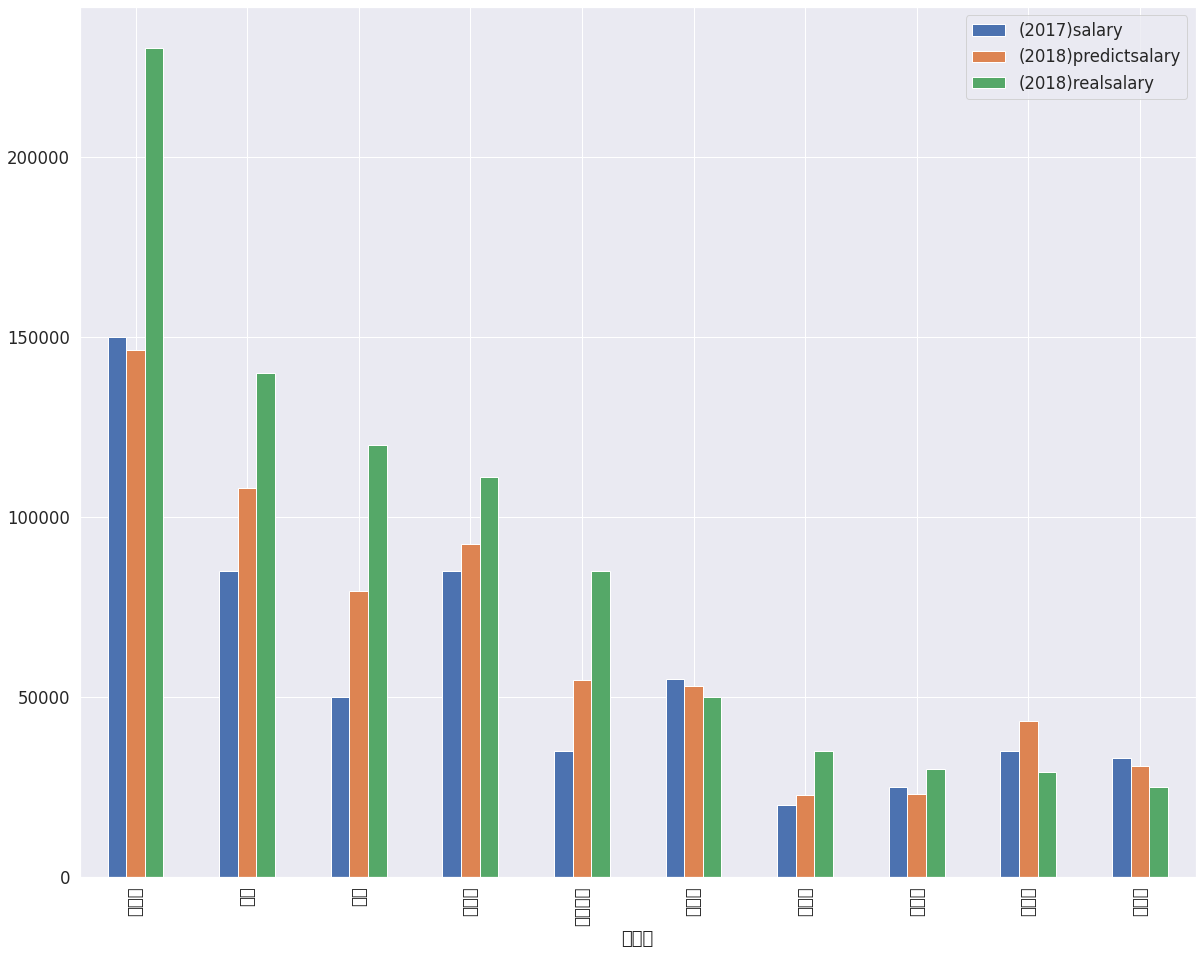

In [ ]:
# 선수별 연봉 정보(작년연봉, 예측연봉, 실제연봉)를 막대 그래프로 출력합니다.
# mpl.rc('font', family='NanumGothicOTF')
# result_df.plot(x='선수명', y=['작년연봉(2017)','실제연봉(2018)'], kind="bar")

# 선수별 연봉 정보(작년연봉, 예측연봉, 실제연봉)를 막대 그래프로 출력한다.
result_df.plot(x='선수명', y=['(2017)salary', '(2018)predictsalary', '(2018)realsalary'],
              kind="bar")

https://blog.naver.com/PostView.naver?blogId=jaehong7719&logNo=221858251419

연봉예측 다양한 알고리즘으로 찾아보기
직접 예측해보고 위의 링크와 비교
모델 만들고나서 플라스크로 웹 만들어서 서빙해보기

주요피쳐 입력받는 페이지 만들고 버튼 누르면 예상연봉 출력